#### SVM：支持向量机
* 与传统算法相比，SVM究竟能带来什么效果
* 软间隔的作用，这么复杂的算法肯定会导致过拟合的现象，如何解决？
* 核函数的作用，如果只是做线性分类，好像轮不到SVM，核函数才是它的强大之处！

In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
warnings.filterwarnings('ignore')
np.random.seed(42)

#### 支持向量机带来的效果

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = iris['target']

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

svm_clf = SVC(kernel='linear', C=float('inf'))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

(np.float64(0.0), np.float64(5.5), np.float64(0.0), np.float64(2.0))

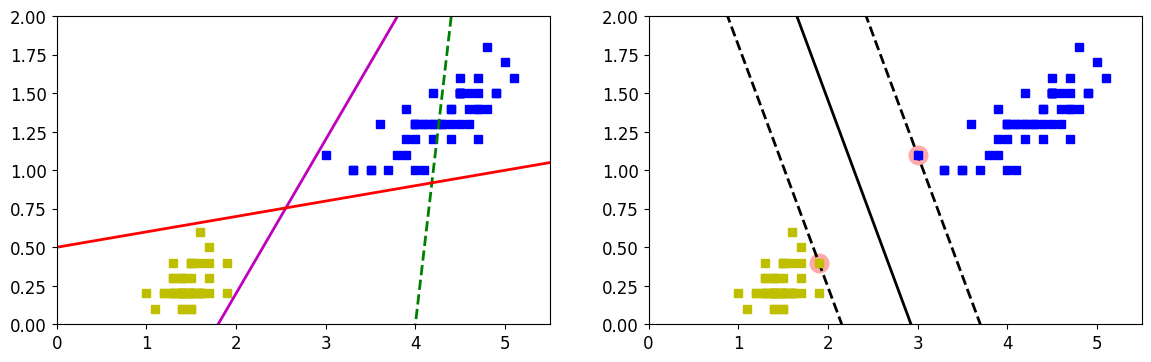

In [6]:
# 一般的模型
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax, sv = True):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]
    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    if sv:
        svs = svm_clf.support_vectors_
        plt.scatter(svs[:, 0], svs[:, 1], s = 180, facecolors = "#FFAAAA")
    plt.plot(x0, decision_boundary, 'k-', linewidth = 2)
    plt.plot(x0, gutter_up, 'k--', linewidth = 2)
    plt.plot(x0, gutter_down, 'k--', linewidth = 2)
plt.figure(figsize=(14, 4))
plt.subplot(121)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'ys')
plt.plot(x0, pred_1, 'g--', linewidth = 2)
plt.plot(x0, pred_2, 'm-', linewidth = 2)
plt.plot(x0, pred_3, 'r-', linewidth = 2)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'ys')
plt.axis([0, 5.5, 0, 2])

#### 软间隔
* 如果不加入软间隔会遇到哪些问题呢？

可以使用超参数C控制软间隔成都：

In [11]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)] # Petal length, petal width
y = (iris['target'] == 2).astype(np.float64)

svm_clf = Pipeline((('std', StandardScaler()), ('linear_svc', LinearSVC(C = 1))))
svm_clf.fit(X, y)

Pipeline(steps=[('std', StandardScaler()), ('linear_svc', LinearSVC(C=1))])

In [12]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

对比不同C值所带来的效果差异

In [13]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C = 1, random_state = 42)
svm_clf2 = LinearSVC(C = 100, random_state = 42)

scaled_svm_clf1 = Pipeline((('std', StandardScaler()), ('linear_svc', svm_clf1)))
scaled_svm_clf2 = Pipeline((('std', StandardScaler()), ('linear_svc', svm_clf2)))
scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(steps=[('std', StandardScaler()),
                ('linear_svc', LinearSVC(C=100, random_state=42))])

(np.float64(4.0), np.float64(6.0), np.float64(0.8), np.float64(2.8))

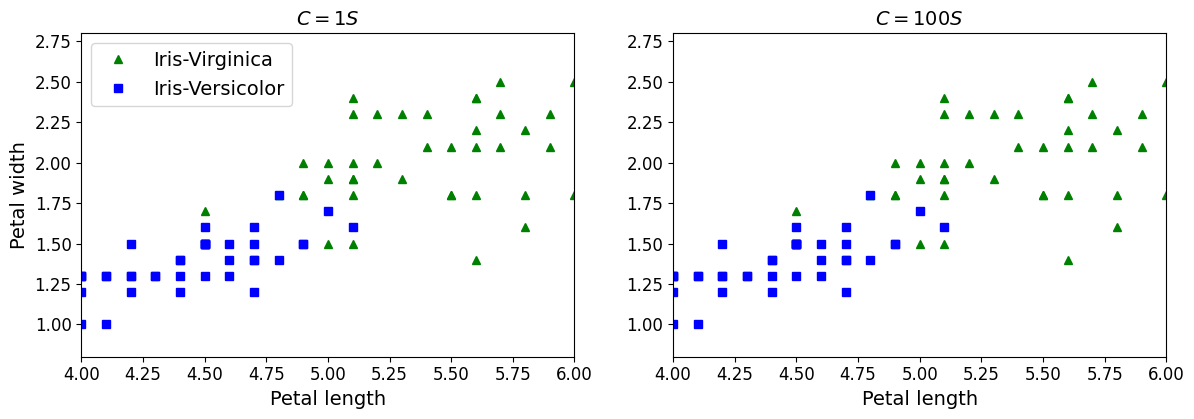

In [17]:
plt.figure(figsize=(14, 4.2))
plt.subplot(121)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'g^', label = 'Iris-Virginica')
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'bs', label = 'Iris-Versicolor')
plot_svc_decision_boundary(svm_clf1, 4, 6, sv = False)
plt.xlabel('Petal length', fontsize = 14)
plt.ylabel('Petal width', fontsize = 14)
plt.legend(loc = 'best', fontsize = 14)
plt.title('$C = {}S$'.format(svm_clf1.C), fontsize = 14)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'g^')
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'bs')
plot_svc_decision_boundary(svm_clf2, 4, 6, sv = False)
plt.xlabel('Petal length', fontsize = 14)
plt.title('$C = {}S$'.format(svm_clf2.C), fontsize = 14)
plt.axis([4, 6, 0.8, 2.8])

#### 非线性支持向量机

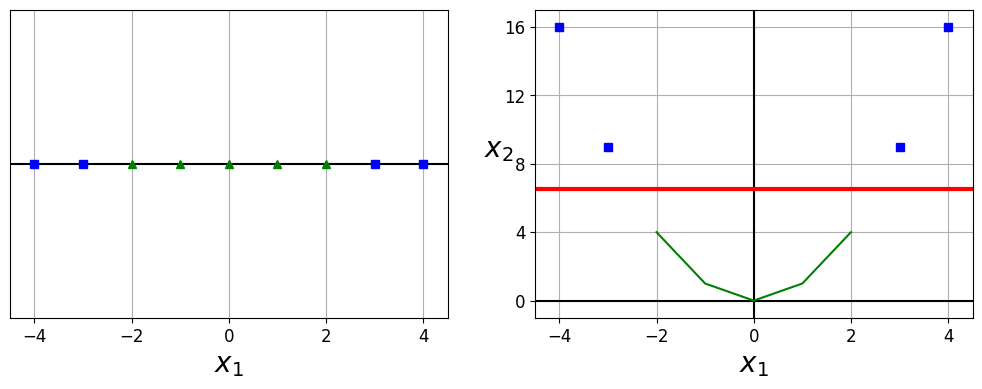

In [42]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[XID, XID ** 2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y == 0], np.zeros(4), 'bs')
plt.plot(X1D[:, 0][y == 1], np.zeros(5), 'g^')
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r'$x_1$', fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5,4.5], [6.5,6.5], "r-", linewidth=3)
plt.axis([-4.5,4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

创建一份有点难度的数据

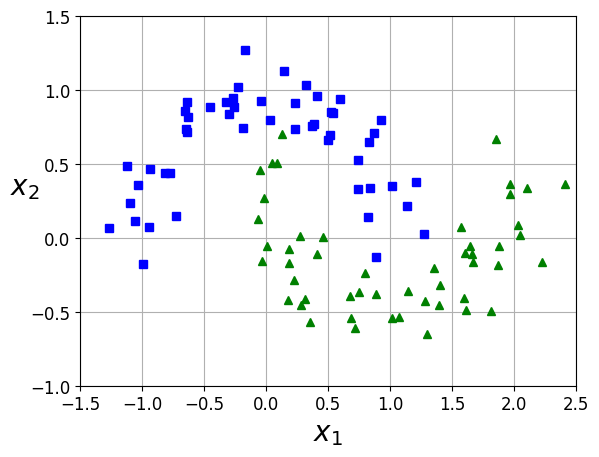

In [43]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [44]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline((
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
    ))
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

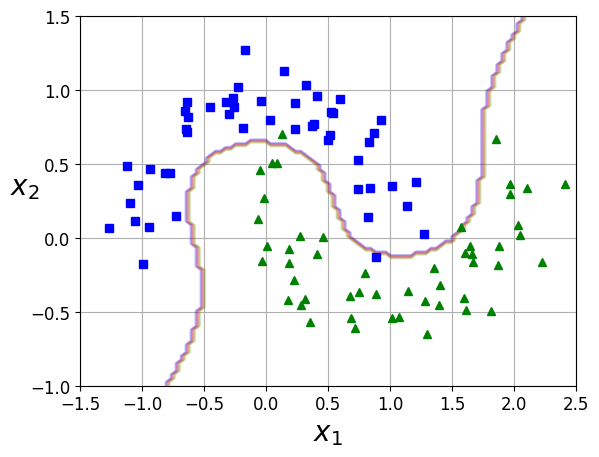

In [45]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contour(x0, x1, y_pred, cmap = plt.cm.brg, alpha = 0.2)
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

#### SVM中的核技巧

In [46]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'poly', degree = 3, coef0 = 1, C = 5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [47]:
from sklearn.svm import SVC
poly100_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'poly', degree = 10, coef0 = 100, C = 5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

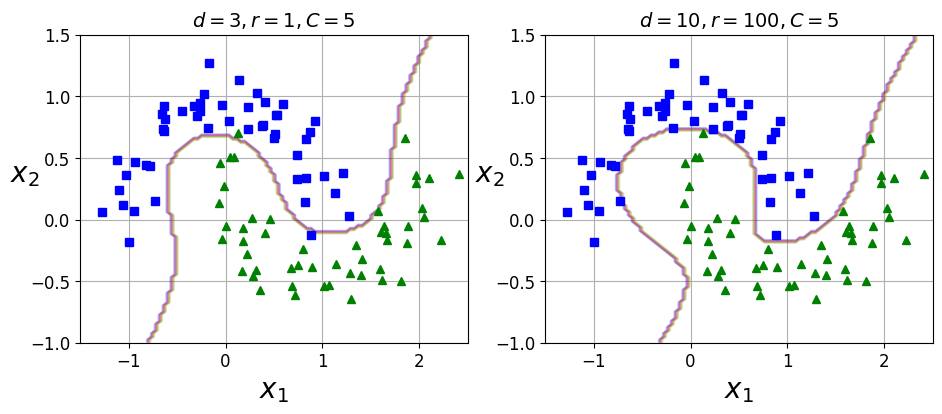

In [48]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=14)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=14)

plt.show()

coef0表示偏置项

#### 高斯核函数
* 利用相似度来变换特征

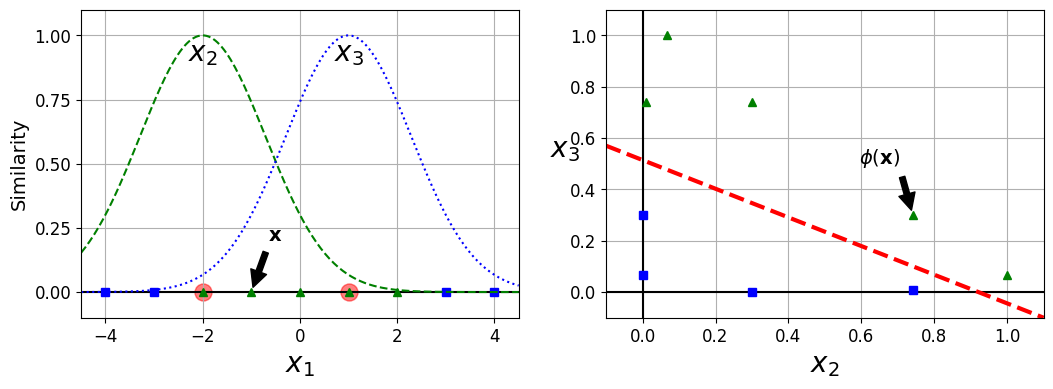

In [60]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c='red')
plt.plot(X1D[:, 0][yk == 0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk == 1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r"$\mathbf{x}$", 
             xy=(X1D[3, 0], 0),
             xytext = (-0.5, 0.20),
             ha = 'center',
             arrowprops=dict(facecolor='black', shrink = 0.1),
             fontsize = 14
             )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$', 
             xy=(XK[3, 0], XK[3, 1]), 
             xytext=(0.65, 0.5),
             ha = 'center',
             arrowprops=dict(facecolor='black', shrink = 0.1),
             fontsize = 14
             )
plt.plot([-0.1, 1.1], [0.57, -0.1], 'r--', linewidth = 3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.subplots_adjust(right=1)
plt.show()

#### SVM中利用了核函数的计算技巧，大大降低了计算复杂度:
* 增加gammaγ使高斯曲线变窄，因此每个实例的影响范围都较小：决策边界最终变得更不规则，在个别实例周围摆动。
* 减少gammaγ使高斯曲线变宽，因此实例具有更大的影响范围，并且决策边界更加平滑。

In [61]:
rbf_kernel_svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma = 5, C = 0.01))
))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.01, gamma=5))])

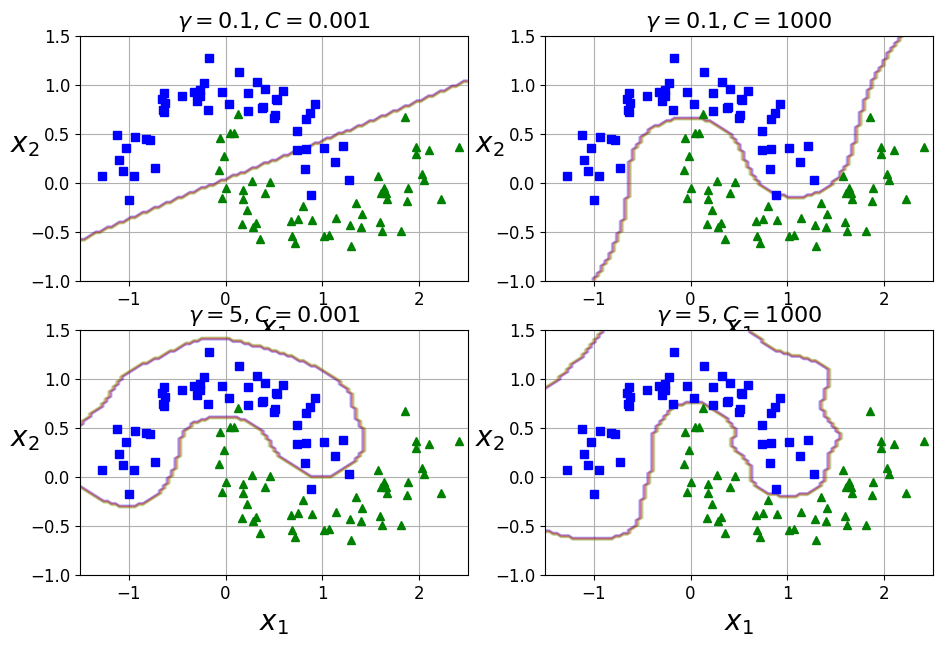

In [62]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel='rbf', gamma=gamma, C=C))
    ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))
for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
plt.show()
